# Data Analysis: lecture 4

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Doing the previous steps
df = pd.read_csv('imports-85.data', header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

# replace ? with nan
df.replace('?', np.nan, inplace=True)

#function to fill the missing value

def fillmissing_numeric(table, col_name):
    table[col_name] = table[col_name].astype('float64')
    table[col_name].fillna(table[col_name].mean(), inplace=True)
    
def fillmissing_object(table, col_name):
    table[col_name] = table[col_name].astype('object')
    table[col_name].fillna(table[col_name].value_counts().idxmax(), inplace=True)
    
# fill the numeric values
fillmissing_numeric(df, 'normalized-losses')
fillmissing_numeric(df, 'bore')
fillmissing_numeric(df, 'stroke')
fillmissing_numeric(df, 'horsepower')
fillmissing_numeric(df, 'peak-rpm')
fillmissing_numeric(df, 'stroke')

#fill the categorical values
fillmissing_object(df, 'num-of-doors')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df['price'] = df['price'].astype('float64')

## Utilizing the machine learning algorithm to run prediction

**<font color='red'>Caution: Not a class to teach machine learning!!</font>**

1. Machine learning for babies
2. How a dumb can understand the basic working principle of ML
3. What is supervised vs unsupervised ML
4. What is classification vs regression
3. Do I need deep learning


**How should we approach the price prediction problem?**

Supervised Learning

Regression Problem

In [4]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


**Step 1: Make the basic model:**

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
model_base = LinearRegression()

In [7]:
# make the trainable set of data
data_X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
data_Y = df['price']

In [8]:
model_base.fit(data_X, data_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model_base.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [10]:
Prediction = model_base.predict(data_X)
Actual = data_Y

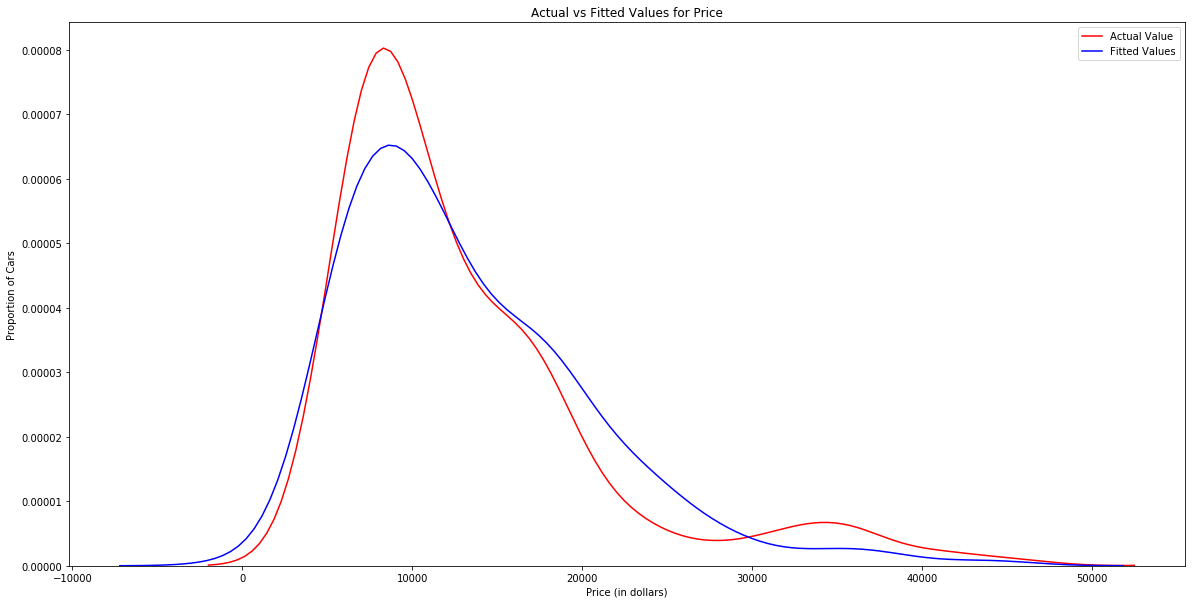

In [11]:
#comparison
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(Actual, hist=False, color="r", label="Actual Value")
sns.distplot(Prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

**Doesn't look too bad !**

But may be better approaches are available.

Let's take a look at the MSE and R-squared error.

In [12]:
mean_squared_error(Actual, Prediction) #the lower it is, the better it is

11980366.87072649

In [13]:
r2_score(Actual, Prediction) #The closer to 1 it is the better it is

0.8093562806577457

**Step 2: Make some refinement from the basic model:**

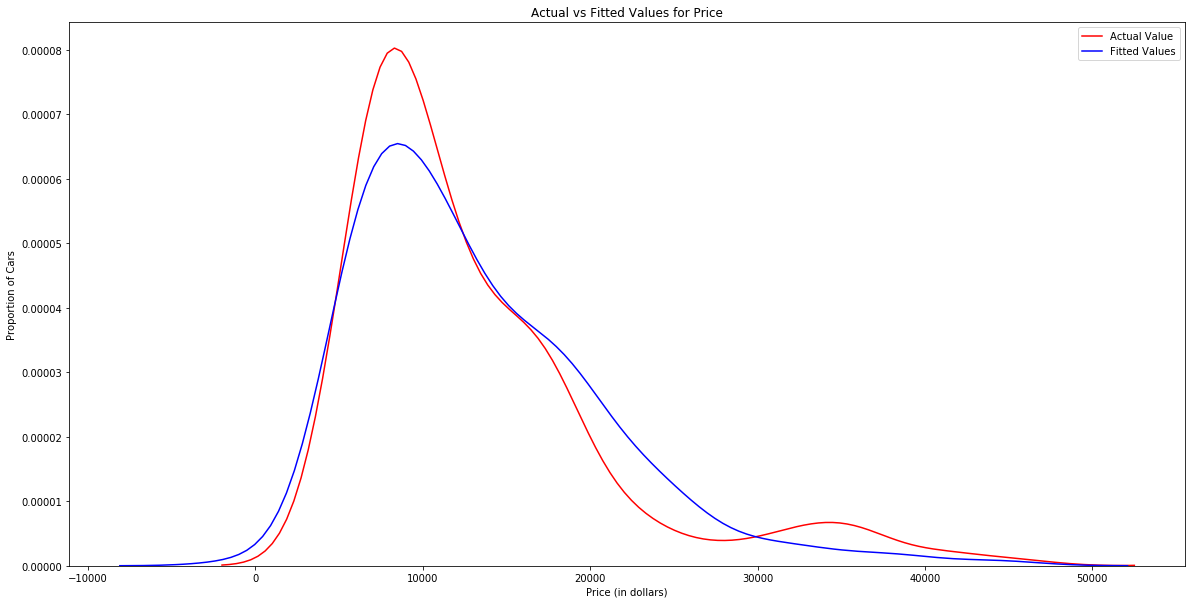

In [14]:
model_01 = LinearRegression()
data_X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'length', 'width']]
data_Y = df['price']
model_01.fit(data_X, data_Y)
Prediction = model_01.predict(data_X)
Actual = data_Y

#comparison
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(Actual, hist=False, color="r", label="Actual Value")
sns.distplot(Prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [15]:
r2_score(Actual, Prediction) #The closer to 1 it is the better it is

0.8169110779243788

In [16]:
mean_squared_error(Actual, Prediction) #the lower it is, the better it is

11505610.906037515

**<font color='red'>Looks slightly better !</font>**

**Step 3: Make an all-inclusive model and try to check its power:**

In [17]:
col_dtypes = df.dtypes.tolist()
categorical_cols = [df.columns[idx] for idx, col_type in enumerate(col_dtypes) if col_type=='O']
df_categorical = pd.get_dummies(df[categorical_cols])
df_categorical

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
numeric_cols = [df.columns[idx] for idx, col_type in enumerate(col_dtypes) if col_type=='int64' or col_type=='float64']
df_numerics = df[numeric_cols]
df_numerics.drop('price', axis=1, inplace=True)
df_numeric_scaled = (df_numerics-df_numerics.mean())/(df_numerics.std())

C:\Users\Sadat\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
data_X = pd.concat([df_categorical, df_numeric_scaled], axis=1)

In [20]:
data_X

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,0,0,0,0,0,0,0,0,0,...,-2.029015,-0.014821,0.075201,0.519668,-1.825276,-0.290709,0.203247,-0.246103,-0.650624,-0.540937
1,1,0,0,0,0,0,0,0,0,0,...,-2.029015,-0.014821,0.075201,0.519668,-1.825276,-0.290709,0.203247,-0.246103,-0.650624,-0.540937
2,1,0,0,0,0,0,0,0,0,0,...,-0.558319,0.516789,0.604724,-2.427303,0.674347,-0.290709,1.354035,-0.246103,-0.961995,-0.687669
3,0,1,0,0,0,0,0,0,0,0,...,0.217881,-0.422710,-0.430252,-0.524828,0.452862,-0.041019,-0.037616,0.799673,-0.183569,-0.100741
4,0,1,0,0,0,0,0,0,0,0,...,0.217881,0.518722,0.219617,-0.524828,0.452862,-0.540399,0.310297,0.799673,-1.117680,-1.274597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,0,0,0,0,0,...,0.708112,0.766162,0.339963,1.676075,-0.338158,-0.165864,0.283535,0.590518,-0.339254,-0.394205
197,0,0,0,0,0,0,0,0,0,0,...,0.708112,0.953676,0.339963,1.676075,-0.338158,-0.365616,1.514610,0.381362,-0.961995,-0.834401
198,0,0,0,0,0,0,0,0,0,0,...,0.708112,0.882150,1.110178,0.930006,-1.224101,-0.340647,0.818785,0.799673,-1.117680,-1.127865
199,0,0,0,0,0,0,0,0,0,0,...,0.708112,1.278441,0.436240,-1.196290,0.452862,3.204952,0.069434,-0.664414,0.127801,-0.540937


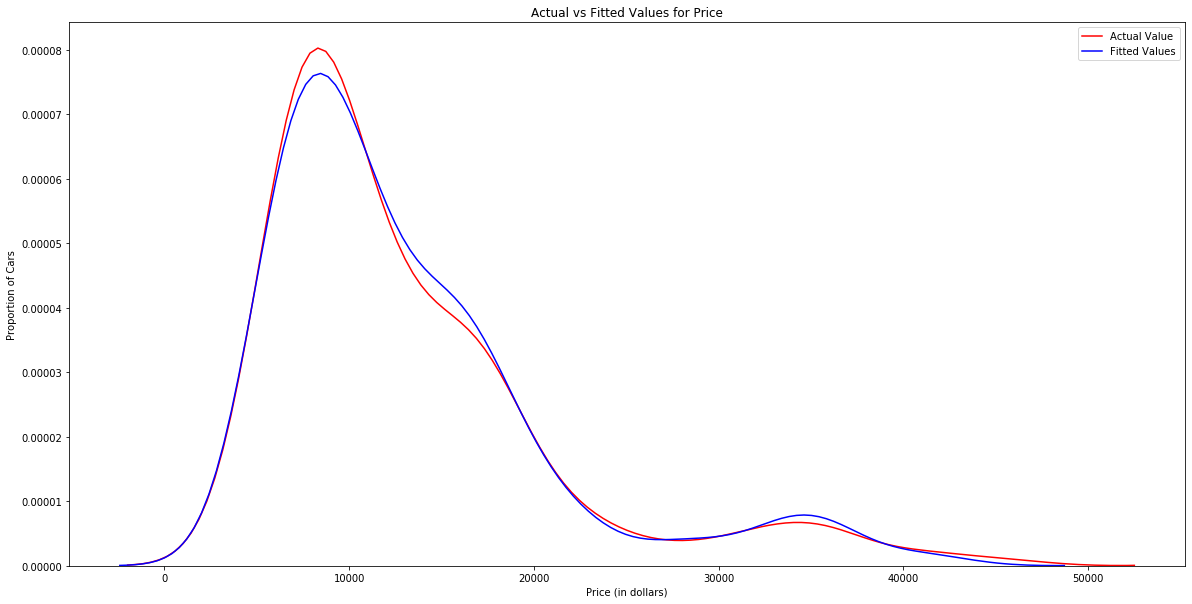

In [21]:
model_02 = LinearRegression()
data_Y = df['price']
model_02.fit(data_X, data_Y)
Prediction = model_02.predict(data_X)
Actual = data_Y

#comparison
plt.figure(figsize=(20, 10))


ax1 = sns.distplot(Actual, hist=False, color="r", label="Actual Value")
sns.distplot(Prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [22]:
r2_score(Actual, Prediction) #The closer to 1 it is the better it is

0.966040849288215

In [23]:
mean_squared_error(Actual, Prediction) #the lower it is, the better it is

2134049.23880597

That's awesome ! A simple Linear Regression model gave us a great model prediction accuracy. But yet, not 100% ! So, we can use the non-linear or polynomial regression to make the accuracy as 100% or near to that. 

**Well, not really what we want for a great prediction job!**

## <font color='red'>Train, test and cross-validation</font>

Train: The dataset which machine really knows and understands, and fit the model parameter on.

Validation: More like a test-exam of our SSC exam. This is not the final one, but really checks if we are doing things correct. Sometimes also used to check bias or variance. Or used to tune the hyperparameters.

Test: The model doesnot know what it is. More like an actual SSC exam. The trained model will be used to run the prediction on the test data.
    

## <font color='red'>Overfit and Underfit</font>

Overfit: If the model performs great with the train data but fails to generalize or in other means, work very poorly we call it an overfit. In this situation we say the variance is pretty high and bias is low. 

Underfit: If the model performs poorly with the training data, we say, the model has high bias and it underfits.

## <font color='red'>Performance metrics</font>

Regression Problem: R-squared and MSE (Mean Squared Error)

Classification Problem: Accuracy, Recall, Precision, F1 score, AUC score etc. 

## <font color='red'>Unsupervised methods</font>

Donot really need the label ! 

PCA: principle component analysis
    
K-means clustering